**Description of work:**

Based on the available data, prepare an analytical report that will later help the producers of educational programs to effectively build a strategy for modernizing and improving courses. At the beginning of the report, it is proposed to draw up a capacious descriptive block for each course based on the calculated indicators. Further, it is proposed to calculate the potential load on teachers in order to assess the need to expand the staff. Then comes a block of two points on the analysis of the quality of course content, where it is necessary to identify problematic modules that may need to be improved. The challenge is also to identify potential seasonality.
<br><br>
[Codebook](#Codebook) <br>
[1. Description and initial work with data](#1.-Description-and-initial-work-with-data)<br>
[2. Calculation of the potential burden on teachers](#2.-Calculation-of-the-potential-burden-on-teachers)<br>
[3. Identification of problem modules](#3.-Identification-of-problem-modules)<br>
[4. Conversion calculation](#4.-Conversion-calculation) 

## Codebook

`courses.csv` contains the following values: <br> <br>
&nbsp;&nbsp;&nbsp;&nbsp; `id`  <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title`<br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field`  <br><br>
`students.csv` contains the following values: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id`  <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city`<br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday`  <br><br>
`course_contents.csv` contains the following values: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` <br>
<br>
`progresses.csv` contains the following values: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` <br><br>
`progress_phases.csv` contains the following values: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status`  <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` 
<br><br>

## 1. Description and initial work with data
_____________________________________________________________________


In [1]:
#loading all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar

In [2]:
##loading CSV files and renaming (if it necessary) column

progress_phases = pd.read_csv('Data/progress_phases.csv')
progresses = pd.read_csv('Data/progresses.csv', header = 0, names = ['progress_id', 'student_id', 'course_id'])
courses = pd.read_csv('Data/courses.csv', index_col = 0,header = 0, names = ['course_id', 'title', 'field'])
course_contents = pd.read_csv('Data/course_contents.csv')

In [3]:
# Merging data

data = pd.merge(left = progress_phases, right = progresses, how='left')
data = data.merge(right = courses, how='left') 
data = data.merge(right = course_contents,  how='left')

data.head(3)

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Web Design PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Web Design PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Web Design PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False


In [4]:
data.course_id.nunique()
print(f'There are {data.course_id.nunique()} courses.' )

There are 15 courses.


In [5]:
print('Number of modules in each course.')
data.groupby(by = "title")['module_number'].nunique().reset_index().set_index('title')

Number of modules in each course.


,module_number
title,
Excel Basic,9
Head of digital projects,17
Interface animation,21
Internet marketer from Ingate,18
Java developer,17
Java developer from zero,9
JavaScript from zero,18
PHP developer from 0 to PRO. Part 1,8
SMM-marketer from A to Z,11


In [6]:
print('The number of lessons in each module in each course.')
items_lesson = data.groupby(by = ['title','module_number' ])['lesson_number'].nunique().reset_index()
items_lesson

The number of lessons in each module in each course.


,title,module_number,lesson_number
0,Excel Basic,1,11
1,Excel Basic,2,7
2,Excel Basic,3,3
3,Excel Basic,4,7
4,Excel Basic,5,5
...,...,...,...
224,Web layout for beginners 2.0,4,8
225,Web layout for beginners 2.0,5,7
226,Web layout for beginners 2.0,6,7
227,Web layout for beginners 2.0,7,7


In [7]:
print('Median number of lessons per module in each course.')
items_lesson.groupby('title').agg({'lesson_number': 'median'})

Median number of lessons per module in each course.


,lesson_number
title,
Excel Basic,5.0
Head of digital projects,5.0
Interface animation,3.0
Internet marketer from Ingate,6.5
Java developer,7.0
Java developer from zero,13.0
JavaScript from zero,7.0
PHP developer from 0 to PRO. Part 1,4.0
SMM-marketer from A to Z,6.0


In [8]:
print('Number of students in each course.')
data.groupby(by = 'title')['student_id'].nunique().reset_index()

Number of students in each course.


,title,student_id
0,Excel Basic,782
1,Head of digital projects,685
2,Interface animation,598
3,Internet marketer from Ingate,2168
4,Java developer,763
5,Java developer from zero,581
6,JavaScript from zero,966
7,PHP developer from 0 to PRO. Part 1,854
8,SMM-marketer from A to Z,506
9,UX-design,1151


In [9]:
DAYS_IN_YEAR = 365.25  #days of the year
#Reading information about students
students = pd.read_csv('Data/students.csv',parse_dates=True)
#dropping unnecessary columns
students = students.drop(['id_','city'], axis=1)
#parsing data
students.birthday = pd.to_datetime(students.birthday, infer_datetime_format=True, errors='coerce')
#dropping empty rows
students.dropna(inplace=True)
#counting ages of students (days)
students['days'] = datetime.datetime.now() - students['birthday']
students['days'] = students['days'].agg(lambda a:a.days)
#cleaning 
students.loc[students['days'] > DAYS_IN_YEAR*100, 'days'] = -1
students.loc[students['days'] < DAYS_IN_YEAR*10, 'days'] = None
students.dropna(inplace=True)
# min max mean median (years)
students['days'].agg(['min','max','mean','median'])/DAYS_IN_YEAR

min       10.390144
max       99.663244
mean      31.440757
median    30.792608
Name: days, dtype: float64

In [10]:
# min max mean median age of students in each course (years)
print('Min, max, mean, median age of students in each course (years)')
temp = pd.merge(left = data, right = students , how='left',
                left_on = 'student_id', 
                right_on='id')

temp = temp.groupby(by = ['title',]).agg({'days' : ['min','max','mean','median']})/DAYS_IN_YEAR
temp.days

Min, max, mean, median age of students in each course (years)


,min,max,mean,median
title,,,,
Excel Basic,18.425736,62.800821,35.395234,35.282683
Head of digital projects,20.585900,56.835044,34.089243,33.497604
Interface animation,17.190965,53.196441,32.025717,31.460643
Internet marketer from Ingate,18.403833,92.271047,33.620184,32.580424
Java developer,16.481862,66.494182,31.903321,30.833676
Java developer from zero,16.158795,56.947296,32.166730,31.307324
JavaScript from zero,15.723477,61.270363,30.807073,30.110883
PHP developer from 0 to PRO. Part 1,15.723477,76.898015,33.276037,31.898700
SMM-marketer from A to Z,19.252567,53.954825,31.093364,30.483231


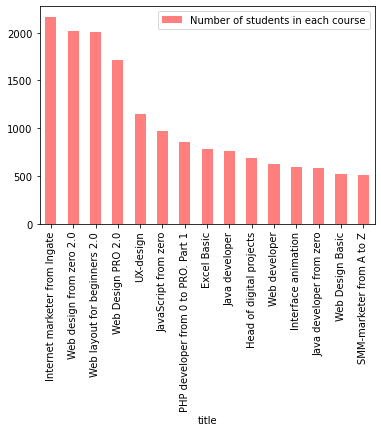

In [11]:
#bar-chart, reflecting the number of students in each course.
temp = data.groupby(by = ['title',]).agg({'student_id' : lambda y: np.unique(y).shape[0], 
                                          'field' :lambda y: np.unique(y) })
temp.columns = ['Number of students in each course', 'field']
temp.sort_values(by = 'Number of students in each course',ascending = False).\
                    plot.bar( color = 'r',alpha = 0.5, )
plt.show()

In [12]:
#Prepare the necessary data for next chart
temp = temp.sort_values(by = 'Number of students in each course')
temp['index'] = list(range(temp.shape[0]))
mediana = temp['Number of students in each course'].apply('median')
сourses = np.unique(temp.field)
сourse_field = temp['field']
temp

,Number of students in each course,field,index
title,,,
SMM-marketer from A to Z,506,Marketing,0
Web Design Basic,518,Design,1
Java developer from zero,581,Development,2
Interface animation,598,Design,3
Web developer,628,Development,4
Head of digital projects,685,Business,5
Java developer,763,Development,6
Excel Basic,782,Business,7
PHP developer from 0 to PRO. Part 1,854,Development,8


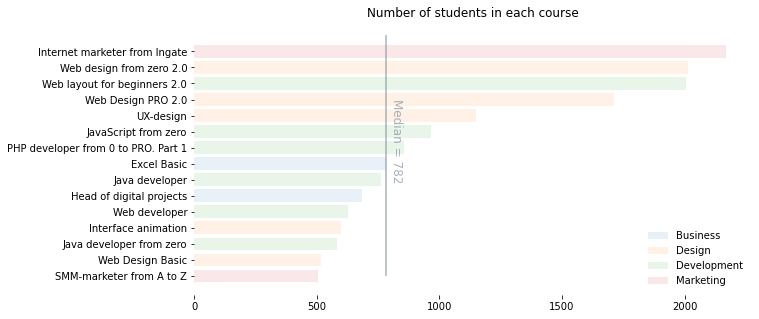

In [13]:
#horizontal bar-chart

def bar(temp,name):
    plot.barh(y = temp['index'].values, 
              width=  temp['Number of students in each course'].values.reshape(-1), alpha = 0.1,
             label = name)
    
fig, plot = plt.subplots(figsize = (10,5))

for name in сourses:
    bar(temp[temp['field']==name],name)   

#Median
plot.vlines(x = temp['Number of students in each course'].apply('median'), color = 'slategrey',
            ymin=0, ymax=15,alpha = 0.6) 
plt.text(x=800, y=6, s = f'Median = {int(mediana)}'
         ,fontsize=12,rotation=-90, color = 'slategrey',alpha = 0.6)

#Removing frames from the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#Add additional information
plt.yticks(temp['index'].values, temp.index.values)
plt.legend(frameon = False)
plt.title('Number of students in each course')
plt.show()

## 2. Calculation of the potential burden on teachers

Growth of students in each course in each month throughout history (each month between March 2016 and July 2019 inclusive). Calculate the start date of the course by the student by the start date of the first homework.
____________________________________________________________________________________________________________

In [14]:
#Setting  pd.datetime types
data.start_date = pd.to_datetime(data.start_date, infer_datetime_format=True,errors='coerce')
data.finish_date = pd.to_datetime(data.finish_date, infer_datetime_format=True,errors='coerce')
#Cleaning. Left only finishing homeworks
data_hw = data[data.is_homework].dropna()
#Adding new columns
data_hw['year_month_done'] = data_hw.finish_date.agg( lambda a:str(a.year) +'-' + ('0'+str(a.month))[-2:] ,)
data_hw['year_month_start'] = data_hw.start_date.agg( lambda a:str(a.year) +'-' + ('0'+str(a.month))[-2:] ,)

#Finding first homework in module
data_hw = pd.merge(data_hw, data_hw.groupby(by = 'title')['module_number'].agg('min'), 
                   how = 'left',on='title', suffixes=('', '_first_hw'))

#Growth of students in each course in each month throughout history 
table = pd.pivot_table(data_hw[data_hw.module_number == data_hw.module_number_first_hw], values='student_id', 
                index=['year_month_start'],columns=['title'], aggfunc=np.count_nonzero).fillna(0).astype(int)
#drop temporary columns
data_hw.drop(columns = 'module_number_first_hw', inplace=True )
table.tail(10)

title,Excel Basic,Head of digital projects,Interface animation,Internet marketer from Ingate,Java developer,Java developer from zero,JavaScript from zero,PHP developer from 0 to PRO. Part 1,SMM-marketer from A to Z,UX-design,Web Design Basic,Web Design PRO 2.0,Web design from zero 2.0,Web developer,Web layout for beginners 2.0
year_month_start,,,,,,,,,,,,,,,
2018-10,29,27,26,86,32,0,33,27,22,26,4,24,108,7,71
2018-11,33,29,11,65,28,0,28,18,11,30,5,21,91,13,74
2018-12,41,36,14,98,92,0,28,32,20,27,5,29,137,5,116
2019-01,52,59,25,136,71,0,41,25,33,45,3,43,206,7,105
2019-02,42,28,17,111,46,0,31,13,34,22,1,46,112,7,74
2019-03,57,34,9,102,71,47,49,31,28,25,2,56,117,8,93
2019-04,35,16,7,102,6,74,40,28,46,13,2,42,98,0,81
2019-05,37,23,7,121,3,56,37,24,43,16,0,47,85,5,73
2019-06,29,11,10,90,3,78,23,22,46,35,0,32,67,2,74


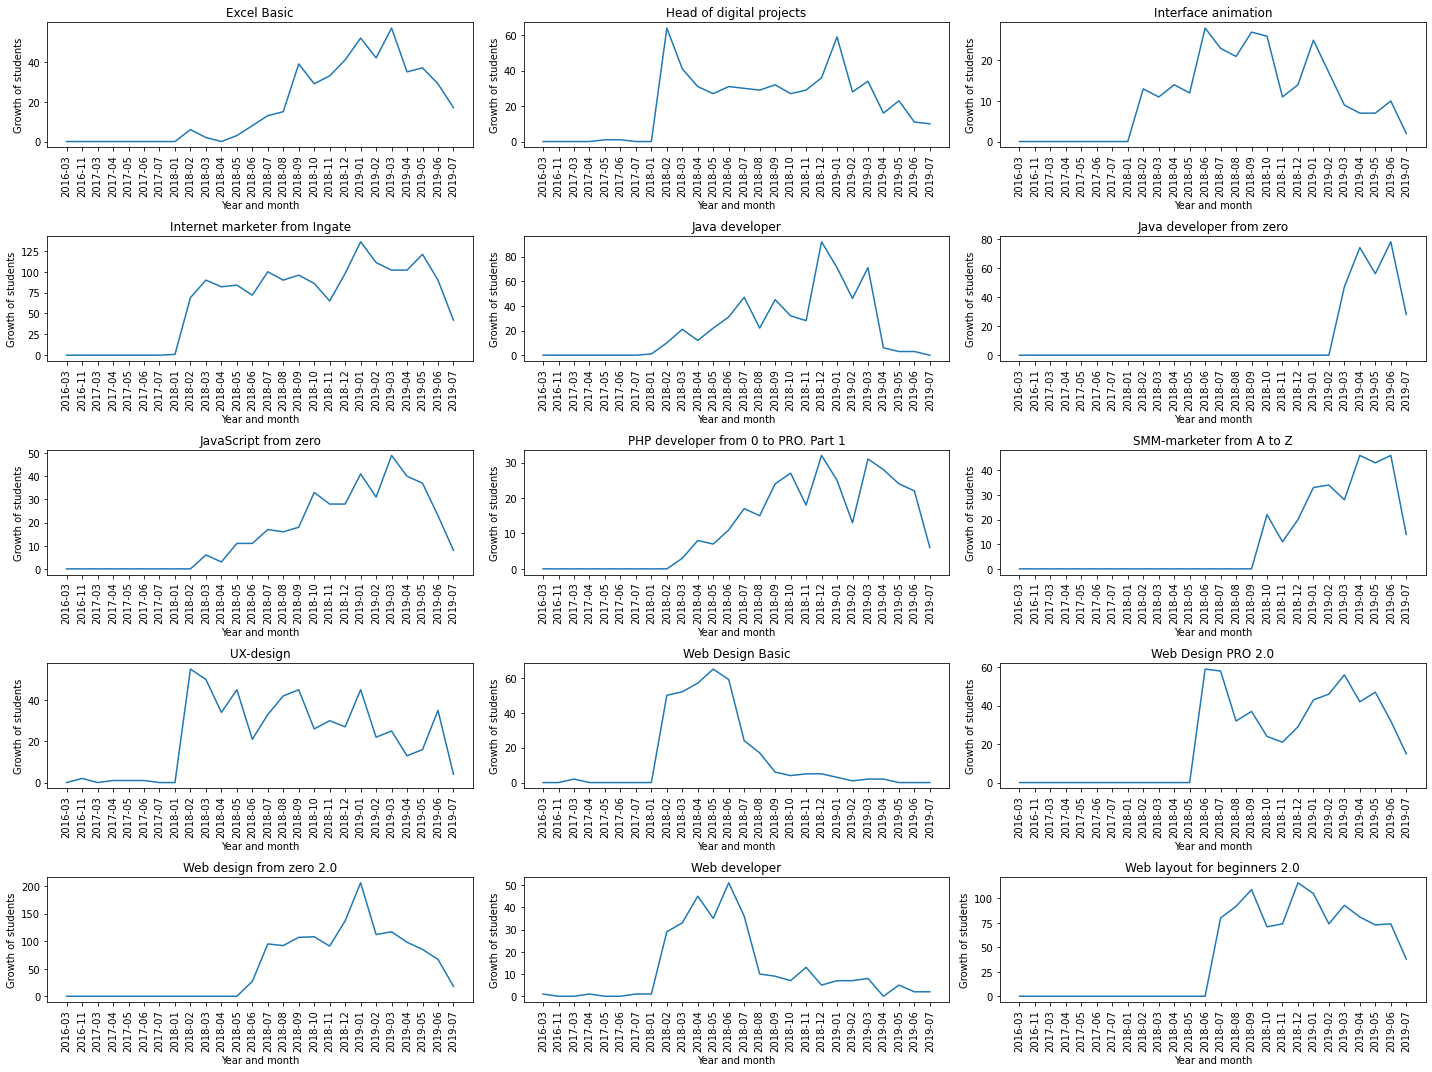

In [15]:
#line-graph with an increase in students in each month for each course. 15 charts.
fig, plot = plt.subplots(nrows=5,ncols=3)
courses = table.columns

#Loop with courses
for i,course in enumerate(courses):
    plot[i//3][i%3].plot(table[course].index ,
          table[course].values, )
    plot[i//3][i%3].set_xticks(plot[i//3][i%3].get_xticks()) 
    plot[i//3][i%3].set_xticklabels(table[course].index, rotation = 'vertical',)  
    plot[i//3][i%3].set_title(course)
    plot[i//3][i%3].set_ylabel('Growth of students')
    plot[i//3][i%3].set_xlabel('Year and month')

#Adjusting the dimensions
fig.set_figwidth(20)    
fig.set_figheight(15)
plt.tight_layout(h_pad = 1)
plt.show()

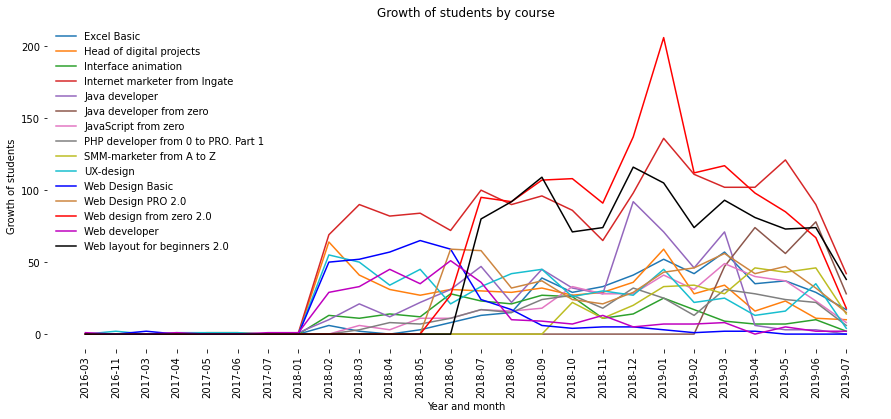

In [16]:
#line-graph with an increase in students in each month for each course. 15 subplots on the graph.
fig, plot = plt.subplots(figsize =(15,6))
colors = [None]*10+['b','peru','r','m','k']

#Loop with courses
for i,course in enumerate(courses):
    plot.plot(table[course].index ,
          table[course].values, label = course, color = colors[i]  )
    plot.set_xticks(plot.get_xticks()) 
    plot.set_xticklabels(table[course].index,rotation = 'vertical',)   

#Adding information
plot.set_title('Growth of students by course') 
plot.set_ylabel('Growth of students')
plot.set_xlabel('Year and month')
plt.legend(frameon = False)

#Removing frames from the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

Number of homework's progresses in each month throughout history

In [17]:
#Creat list of year month combinations
year_month_done_unique = data_hw.year_month_done.unique()
year_month_start_unique = data_hw.year_month_start.unique()
year_month = list(set(list(year_month_start_unique )+ list(year_month_done_unique)))
year_month.sort()

#Add this lists like columns
data_hw[year_month] = 0

#Spreading processing for all time
def f(my_list):
    '''Helper function'''
    start = my_list['year_month_start']
    finish = my_list['year_month_done']
    for i in year_month[year_month.index(finish):year_month.index(start)]:
        my_list[i] =1
    my_list[finish] =1
    return my_list
    
data_hw = data_hw.apply(f, axis=1,)

#Creating table
table = data_hw.groupby(by = 'title')[year_month].sum().transpose()
#Cleaning
data_hw.drop( columns=year_month, inplace=True, )
print("Number of homework's progresses in each month throughout history")
table.tail(10)

Number of homework's progresses in each month throughout history


title,Excel Basic,Head of digital projects,Interface animation,Internet marketer from Ingate,Java developer,Java developer from zero,JavaScript from zero,PHP developer from 0 to PRO. Part 1,SMM-marketer from A to Z,UX-design,Web Design Basic,Web Design PRO 2.0,Web design from zero 2.0,Web developer,Web layout for beginners 2.0
2018-10,196,201,93,328,144,0,90,63,10,149,128,140,630,79,209
2018-11,168,151,90,437,132,0,107,33,33,146,101,149,749,87,235
2018-12,184,149,60,446,255,0,116,73,31,135,77,160,936,52,280
2019-01,250,214,113,540,310,0,200,77,38,178,94,188,1534,49,319
2019-02,259,227,92,510,306,0,219,45,85,167,70,219,1392,68,276
2019-03,280,239,94,481,355,31,230,56,76,181,51,319,1409,44,309
2019-04,240,176,47,452,171,379,214,92,108,132,58,292,1291,38,288
2019-05,241,182,50,395,103,492,218,87,104,132,38,338,1044,35,260
2019-06,199,108,57,471,72,759,237,64,112,154,31,364,1036,37,270
2019-07,157,103,24,296,36,616,101,29,127,86,24,173,458,16,141


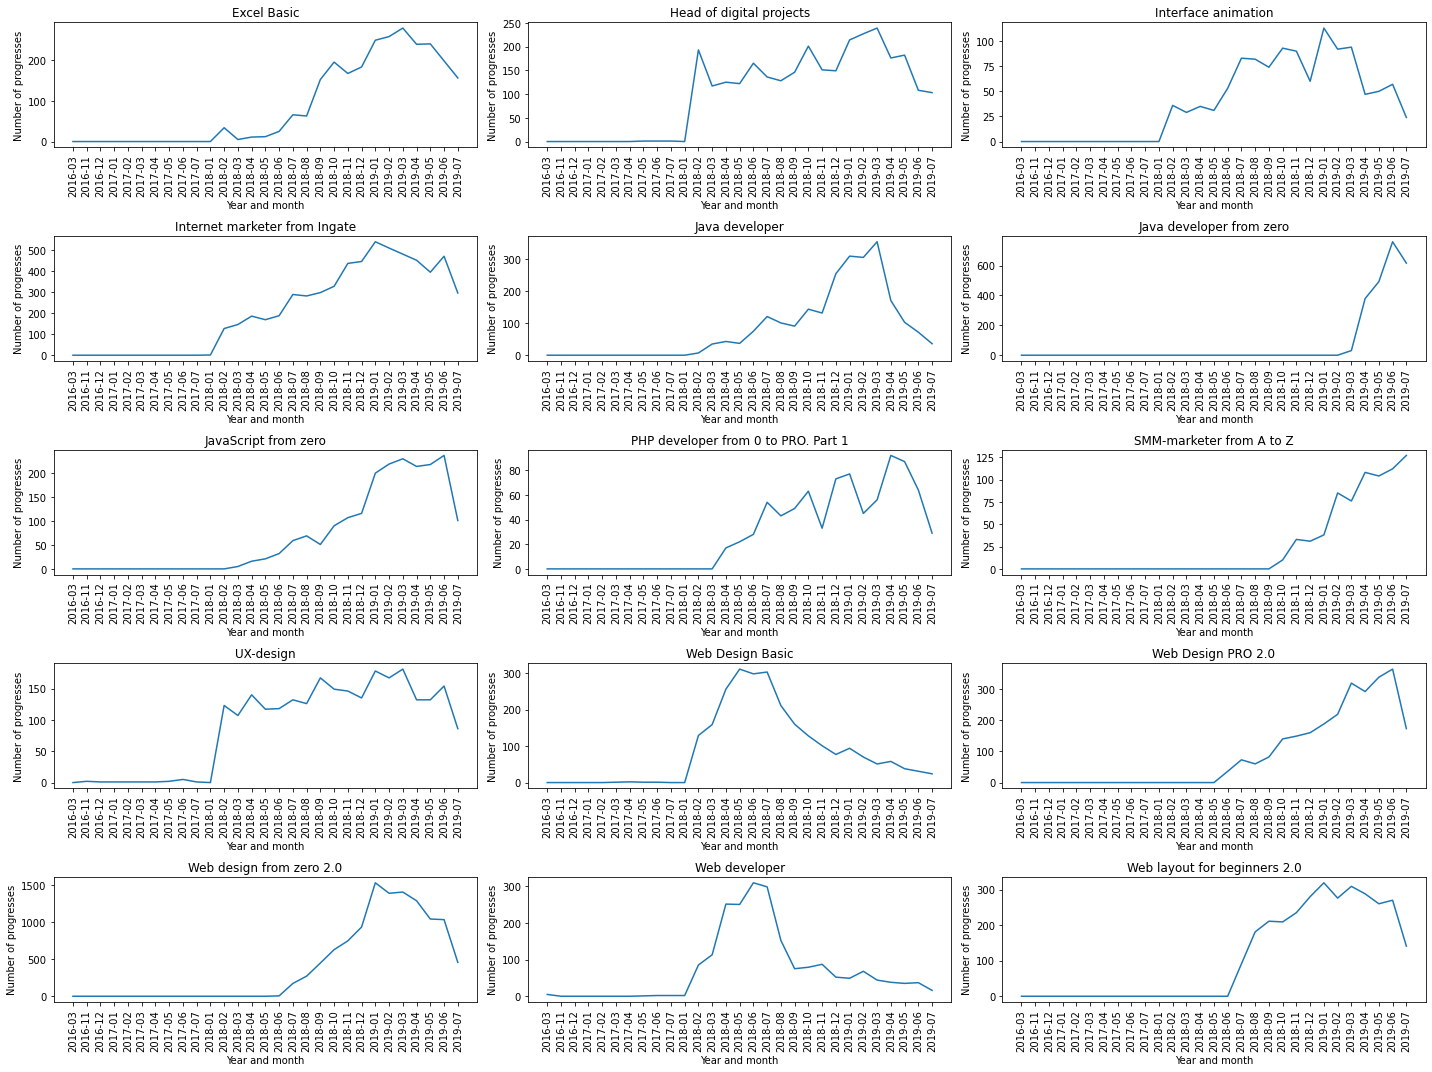

In [18]:
#line-graph with progresses in each month for each course. 15 charts.
fig, plot = plt.subplots(nrows=5,ncols=3)

#Loop with courses
for i,course in enumerate(courses):
    plot[i//3][i%3].plot(table[course].index ,
          table[course].values, )
    plot[i//3][i%3].set_xticks(plot[i//3][i%3].get_xticks()) 
    plot[i//3][i%3].set_xticklabels(table[course].index,rotation = 'vertical',)   
    plot[i//3][i%3].set_title(course)
    plot[i//3][i%3].set_ylabel('Number of progresses')
    plot[i//3][i%3].set_xlabel('Year and month')

#Adjusting the dimensions
fig.set_figwidth(20)    
fig.set_figheight(15)
plt.tight_layout(h_pad = 1)
plt.show()

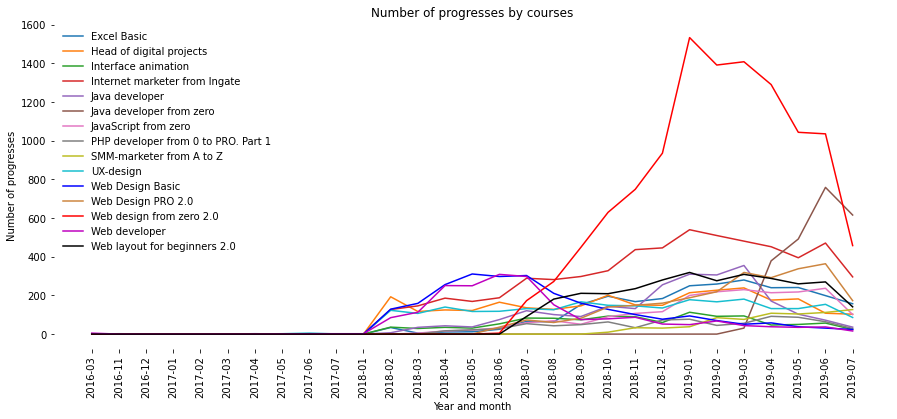

In [19]:
#line-graph with progresses in each month for each course. 15 lines on the chart.
fig, plot = plt.subplots(figsize =(15,6))

#Loop with courses
for i,course in enumerate(courses):
    plot.plot(table[course].index ,
          table[course].values, label = course, color = colors[i] )
    plot.set_xticks(plot.get_xticks())
    plot.set_xticklabels(table[course].index,rotation = 'vertical',)   

#Adding information   
plot.set_title('Number of progresses by courses') 
plot.set_ylabel('Number of progresses')
plot.set_xlabel('Year and month')
plt.legend(frameon = False)

#Removing frames from the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

## 3. Identification of problem modules


Minimum, maximum, average, median time to complete each module (difference between homework start and finish time) for each course. Calculate the difference between the start time of the first homework and the end time of the last homework in the module
______________________________________________________________________________________________________________

In [20]:
#Creating column with informations about first homework in modules 
data_hw = pd.merge(data_hw, data_hw.groupby(by = ['title','module_number'])['lesson_number'].agg(min), 
                   how = 'left', on=['title','module_number'] , suffixes=('', '_first_hw')) 

#Creating columns of first and last homework in modules for each students
data_hw = pd.merge(data_hw,data_hw.groupby( by = ['progress_id','module_number'])['start_date'].agg(min),
         how = 'left', on=['progress_id','module_number'] , suffixes=('', '_first_hw'))
data_hw = pd.merge(data_hw,data_hw.groupby( by = ['progress_id','module_number'])['finish_date'].agg(max),
         how = 'left', on=['progress_id','module_number'] , suffixes=('', '_last_hw'))

# counting time to complete each module each students
data_hw['hw_duration'] = data_hw.finish_date_last_hw - data_hw.start_date_first_hw
#data_hw.head()

In [21]:
#Creating table with minimum, maximum, average, median time to complete each module
table = data_hw[data_hw['lesson_number'] == data_hw['lesson_number_first_hw']].\
    groupby( by = ['title','module_number' ])['hw_duration'].agg(
            ['min','max',lambda x: np.mean(x),lambda x: np.median(x)])

#Some additions needed for the table
table.rename(columns = {'<lambda_0>' :'mean','<lambda_1>' :'median' }, inplace=True)
table.reset_index(inplace = True)
table.set_index(keys = 'module_number', inplace=True, )
table

,title,min,max,mean,median
module_number,,,,,
1,Excel Basic,-1 days +23:59:59.999725,183 days 17:57:52.247793,5 days 23:47:54.195382096,2 days 07:24:50.049678
2,Excel Basic,-1 days +23:59:59.999707,184 days 06:27:48.841839,4 days 07:20:42.029634647,1 days 20:24:06.134843500
3,Excel Basic,-1 days +23:59:59.999765,89 days 03:11:50.758958,3 days 09:55:13.662154715,1 days 11:54:27.957196
4,Excel Basic,-1 days +23:59:59.999748,327 days 13:09:58.465046,10 days 21:22:39.171686788,3 days 04:58:46.128977
5,Excel Basic,-1 days +23:59:59.999683,175 days 13:10:49.724595,7 days 08:15:41.042986359,2 days 23:30:55.474674500
...,...,...,...,...,...
4,Web layout for beginners 2.0,-1 days +23:59:59.999600,289 days 02:47:37.978891,32 days 02:18:37.044725586,18 days 20:04:45.020018
5,Web layout for beginners 2.0,-1 days +23:59:59.999635,287 days 20:09:47.800209,37 days 08:29:11.164721113,24 days 00:58:23.211879
6,Web layout for beginners 2.0,-1 days +23:59:59.999515,235 days 20:42:23.287099,28 days 03:18:58.911037252,18 days 01:20:13.393552


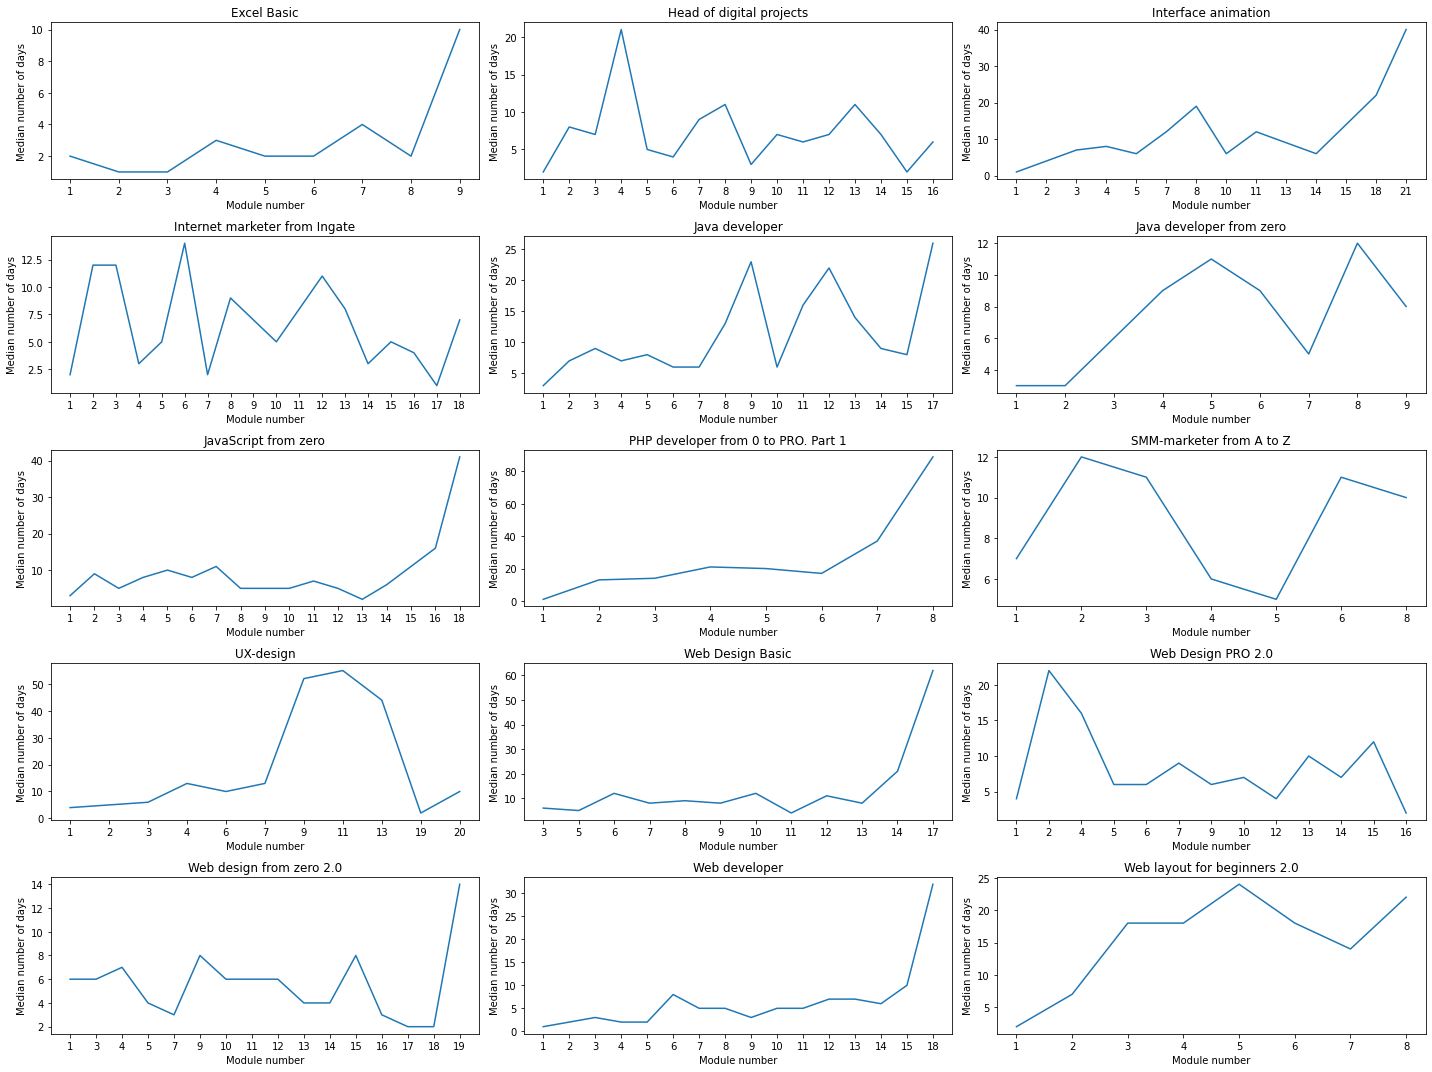

In [22]:
#line-graph with the median progress of each course for each course. 15 charts.
fig, plot = plt.subplots(nrows=5,ncols=3)

#Loop with courses
for i,course in enumerate(courses):
    
    plot[i//3][i%3].plot(
        list(map(str,table[table['title'] == course].index)),
        table[table['title'] == course]['median'].agg(lambda x: x.days+x.seconds//(3600*24)) ,
    )
    plot[i//3][i%3].set_title(course)
    plot[i//3][i%3].set_xlabel('Module number')    
    plot[i//3][i%3].set_ylabel('Median number of days')
    
#Adjusting the dimensions
fig.set_figwidth(20)    
fig.set_figheight(15)
plt.tight_layout(h_pad = 1)
plt.show()

Median homework time by month (12 months, January-December) for each course.
_____________________________________________________________________________

In [23]:
#Creating column with number of month
data_hw['month_start'] = data_hw['year_month_start'].agg(lambda f:f[-2:])

#Creating table with median homework time by month (12 months, January-December) for each course
table = data_hw[data_hw['lesson_number'] == data_hw['lesson_number_first_hw']].\
        groupby(by = ['title','month_start'])['hw_duration'].agg(lambda x: np.median(x))

#Some additions needed for the table
table = table.reset_index()
table.set_index(keys = ['title','month_start'], inplace=True, )
table

hw_duration
title                        month_start                           
Excel Basic                  01           2 days 05:15:40.334257500
                             02              2 days 05:46:39.750756
                             03              2 days 19:52:58.386801
                             04           1 days 22:33:43.881223500
                             05              2 days 09:55:16.146759
...                                                             ...
Web layout for beginners 2.0 08           7 days 18:36:20.454181500
                             09             10 days 01:59:09.709707
                             10          11 days 22:13:21.712083500
                             11           9 days 18:39:02.555395500
                             12              8 days 11:40:18.504984

[171 rows x 1 columns]

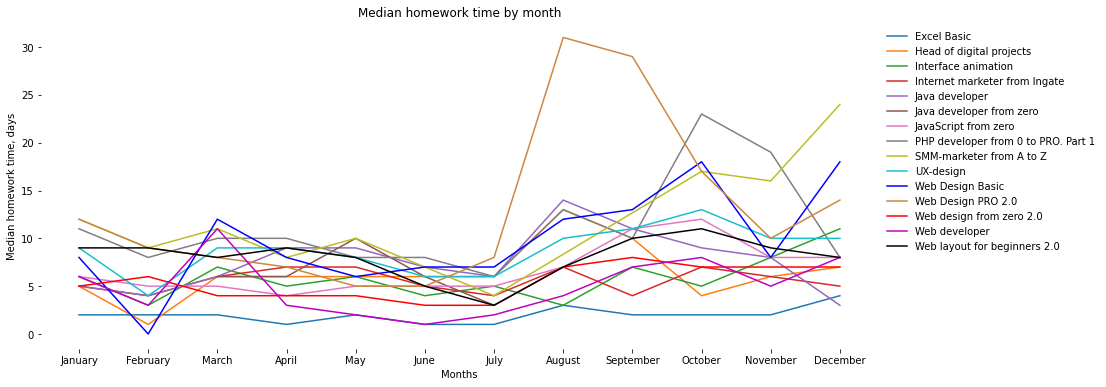

In [24]:
#line-graph with median homework time by month. 15 lines on the chart.
fig, plot = plt.subplots(figsize =(15,6))

#Loop with courses
for i,course in enumerate(courses):
    plot.plot(
        table['hw_duration'][course].index,
        table['hw_duration'][course].agg(lambda x: x.days+x.seconds//(3600*24)), #days
        label = course, color = colors[i] )

#Adding information    
plot.set_title('Median homework time by month') 
plot.set_ylabel('Median homework time, days')
plot.set_xlabel('Months')
plt.legend(bbox_to_anchor=(1, 1),frameon = False)
plt.xticks(table['hw_duration'][course].index,calendar.month_name[1:] )

#Removing frames from the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

## 4. Conversion calculation
______________

In [25]:
table = data[data.is_homework] #working only with homework modules

#Seaching first and last homeworks in modules
table = pd.merge(table, table.groupby(by = ['title','module_number'])['lesson_number'].agg(min), 
                   how = 'left', on=['title','module_number'] , suffixes=('', '_first_hw')) 
table = pd.merge(table, table.groupby(by = ['title','module_number'])['lesson_number'].agg(max), 
                   how = 'left', on=['title','module_number'] , suffixes=('', '_last_hw'))

#Counting students who start and who finish modules
table_conversion = pd.merge(table[table['lesson_number'] == table['lesson_number_last_hw']].groupby(
        by = ['title','module_number','module_title'])['student_id'].count(),
                            data_hw[data_hw['lesson_number'] == data_hw['lesson_number_first_hw']].groupby(
        by = ['title','module_number','module_title'])['student_id'].count() ,
                            left_index =True, right_index = True, )

#Some additions needed for the table
table_conversion.rename({'student_id_x' :'start'  ,'student_id_y' : 'finish'}, axis=1, inplace = True)
table_conversion.reset_index(inplace = True)
table_conversion.head()

,title,module_number,module_title,start,finish
0,Excel Basic,1,Основной функционал Excel,518,458
1,Excel Basic,2,Основной функционал Excel (продолжение),434,406
2,Excel Basic,3,Формулы и функции Excel. Введение,398,387
3,Excel Basic,4,Формулы и функции Excel. Продолжаем работать с...,345,303
4,Excel Basic,5,Формулы и функции Excel. Более сложные формулы,298,270


In [26]:
#For future concatenation create new column
table_conversion['module_number_before'] = table_conversion['module_number'] - 1

#Merge with shift
table_conversion = pd.merge(table_conversion[['title', 'module_number','finish','module_title']], 
         table_conversion[['title', 'module_number_before','start',]],
         how = 'inner',
        left_on = ['title', 'module_number',],
        right_on= ['title', 'module_number_before',],
        )

#Counting conversion
table_conversion['conversion'] = table_conversion['start']/table_conversion['finish']

#Create a column with module number and title together
table_conversion.module_title = table_conversion.apply(
    lambda x: str(x.module_number) +'. '+ x.module_title[:15] ,axis=1,)
table_conversion

,title,module_number,finish,module_title,module_number_before,start,conversion
0,Excel Basic,1,458,1. Основной функци,1,434,0.947598
1,Excel Basic,2,406,2. Основной функци,2,398,0.980296
2,Excel Basic,3,387,3. Формулы и функц,3,345,0.891473
3,Excel Basic,4,303,4. Формулы и функц,4,298,0.983498
4,Excel Basic,5,270,5. Формулы и функц,5,263,0.974074
...,...,...,...,...,...,...,...
148,Web layout for beginners 2.0,3,460,3. Основы CSS,3,471,1.023913
149,Web layout for beginners 2.0,4,268,4. Основы JavaScri,4,277,1.033582
150,Web layout for beginners 2.0,5,160,5. Адаптивность и,5,173,1.081250
151,Web layout for beginners 2.0,6,119,6. Оформление,6,125,1.050420


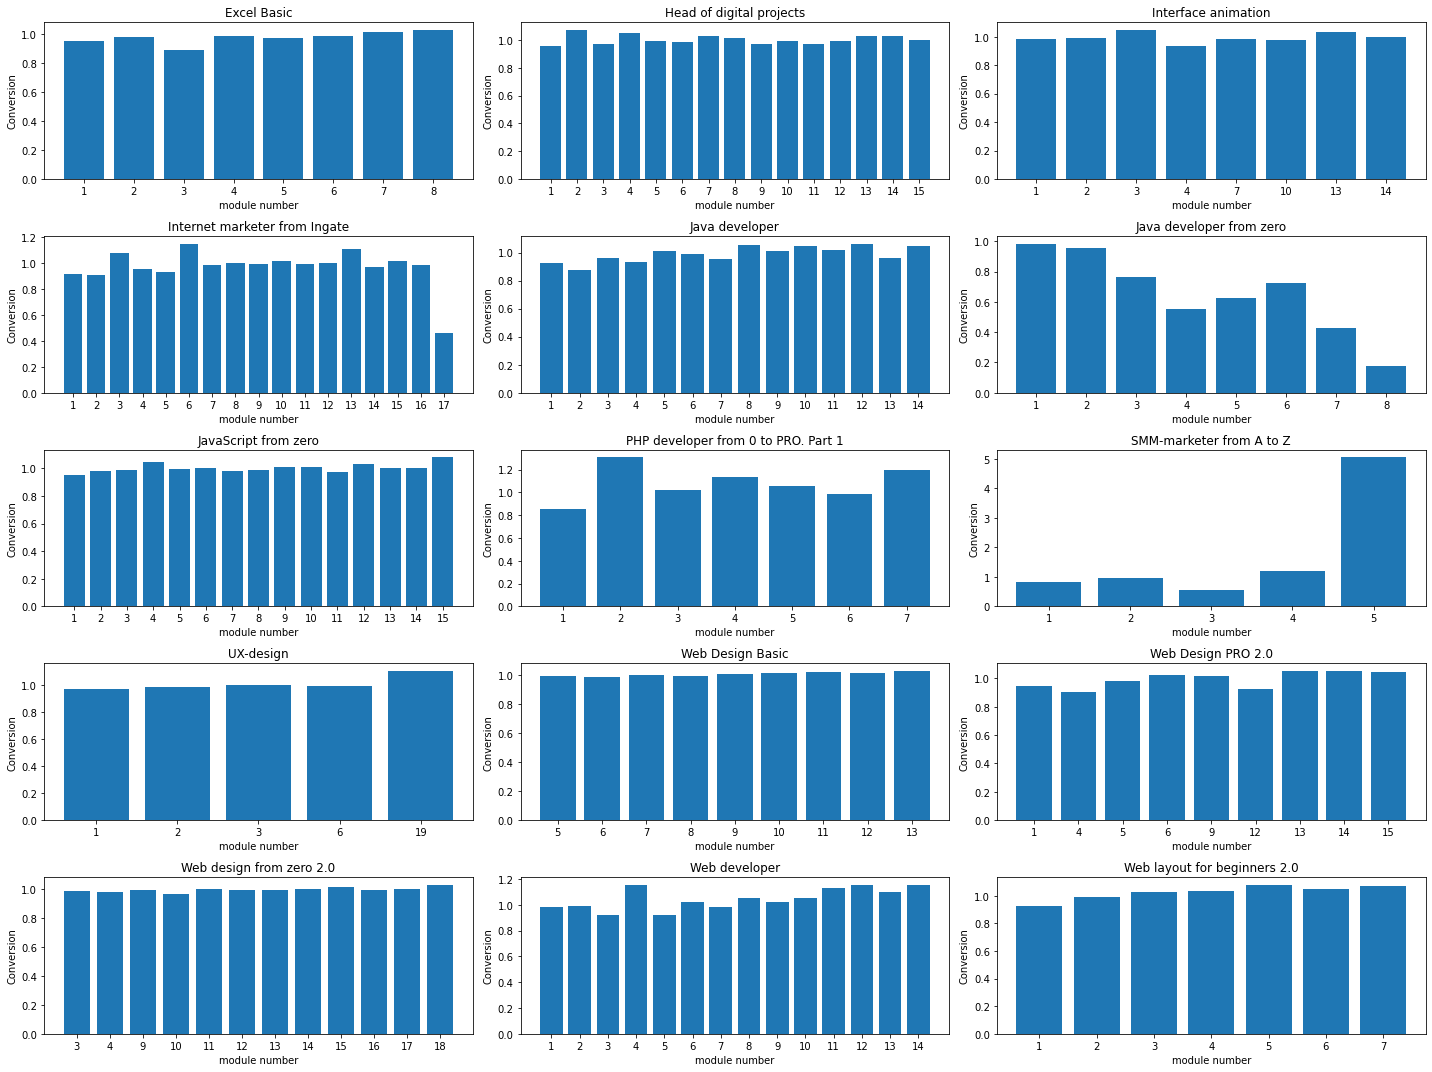

In [27]:
#bar-chart reflecting the conversion of students from one module to another. 15 charts.
fig, plot = plt.subplots(nrows=5,ncols=3)

#Loop with courses
for i,course in enumerate(courses):
    
    plot[i//3][i%3].bar(
        x = table_conversion[table_conversion['title'] == course]['module_number'].astype(str),
        height = table_conversion[table_conversion['title'] == course]['conversion'],
    )
    
    plot[i//3][i%3].set_title(course)
    plot[i//3][i%3].set_xlabel('module number')    
    plot[i//3][i%3].set_ylabel('Conversion')
    
#Adjusting the dimensions
fig.set_figwidth(20)    
fig.set_figheight(15)
plt.tight_layout(h_pad = 1)
plt.show()

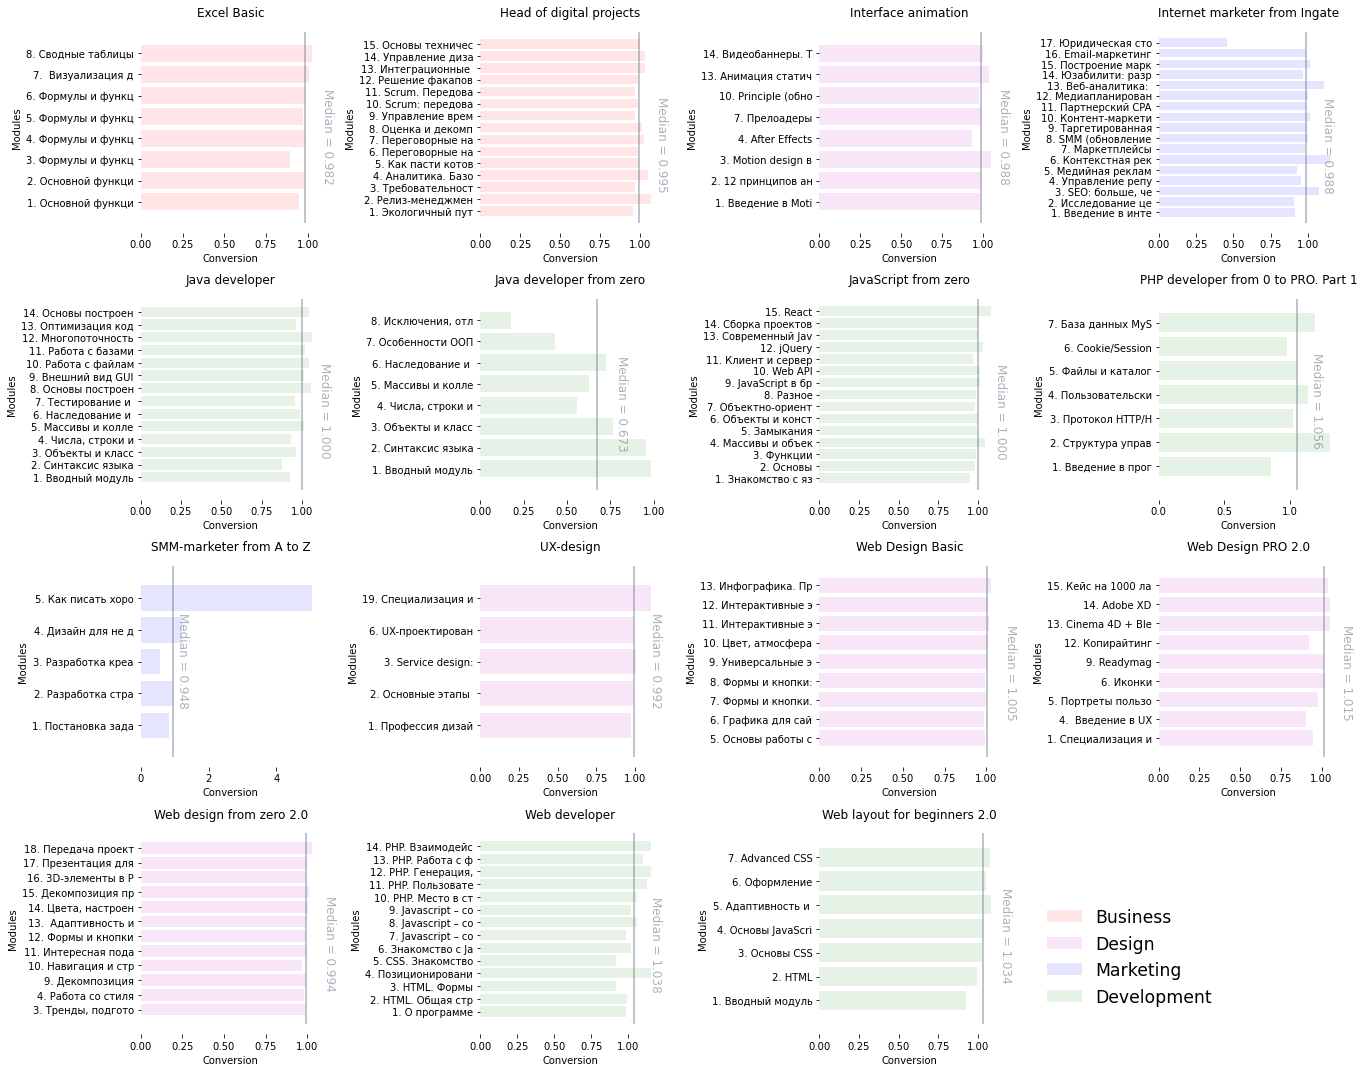

In [28]:
#bar-chart reflecting the conversion of students from one module to another. 15 charts.
fig, plot = plt.subplots(nrows=4,ncols=4)

colors = {
    'Business':'r',
    'Development':'g',
    'Marketing':'b',
    'Design':'m'
}

bar_legend = set()
bar_list = []

#Loop with courses
for i,course in enumerate(courses):
    
    temp = plot[i//4][i%4].barh(
        y = table_conversion[table_conversion['title'] == course]['module_title'],
        width = table_conversion[table_conversion['title'] == course]['conversion'],
        label = сourse_field[course],color = colors[сourse_field[course]],alpha = 0.1
    )
    
    if not(temp.get_label() in bar_legend) :
        bar_list.append(temp)
        bar_list.append(temp.get_label())
        bar_legend.add(temp.get_label())
    
    fig.set_label(сourse_field[course])
    
    plot[i//4][i%4].set_title(course)
    plot[i//4][i%4].set_ylabel('Modules')    
    plot[i//4][i%4].set_xlabel('Conversion')
    
    table_conversion[table_conversion['title'] == course]['conversion'].apply('median')
    
    
    #Median
    median = table_conversion[table_conversion['title'] == course]['conversion'].apply('median')
    
    plot[i//4][i%4].vlines(
        x = median, 
        color = 'slategrey', ymin=-1, alpha = 0.6,
        ymax=table_conversion[table_conversion['title'] == course]['module_title'].shape[0]) 
    
    plot[i//4][i%4].text(x=median+0.1, 
                         y=table_conversion[table_conversion['title'] == course]['module_title'].shape[0]/8, 
                         s = f'Median = {median:0.3f}'
         ,fontsize=12,rotation=-90, color = 'slategrey',alpha = 0.6)
    
#Removing frames from the chart
    for spine in plot[i//4][i%4].spines.values():
        spine.set_visible(False)

plot[3,3].axis('off')

#Adjusting the dimensions
fig.set_figwidth(19)    
fig.set_figheight(15)
plt.tight_layout(h_pad = 1)
fig.legend(
    bar_list[::2],bar_list[1::2],loc ='lower right',frameon = False,fontsize = 'xx-large',
    bbox_to_anchor=(0.9, 0.05))
plt.show()